# Clustering of Total Dataset 2 (10% Intervals)
In the following Notebook, we will be examining and contrasting participants based on their total net income or net loss over the course of the test measured at 10% intervals. That is to say that, for a participant with 100 turns, we will examine their *10th*, *20th*, *30th*, .., and *100th* round. Clustering participants based on these features will result in a **10-Dimensional space**. We will then perform *Principal Component Analysis* to understand which of these features are most important. Depending on the results of PCA, we will either perform dimensionality reduction or choose to continue with all 10 features.  

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

## Importing Data

In [2]:
full_sets = []

full_wins_95=pd.read_csv("../data/cleaned/full_Wins_95.csv").iloc[:,:-2]
full_sets.append(full_wins_95)
full_wins_100=pd.read_csv("../data/cleaned/full_Wins_100.csv").iloc[:,:-2]
full_sets.append(full_wins_100)
full_wins_150=pd.read_csv("../data/cleaned/full_Wins_150.csv").iloc[:,:-2]
full_sets.append(full_wins_150)

full_losses_95=pd.read_csv("../data/cleaned/full_Losses_95.csv").iloc[:,:-2]
full_sets.append(full_losses_95)
full_losses_100=pd.read_csv("../data/cleaned/full_Losses_100.csv").iloc[:,:-2]
full_sets.append(full_losses_100)
full_losses_150=pd.read_csv("../data/cleaned/full_Losses_150.csv").iloc[:,:-2]
full_sets.append(full_losses_150)

## Initial Data Manipulation
From the datasets we previously created, we would like to calculate a participant's net gain (or loss) at each measured interval for each subject. The calculation is simply  the difference between **`full_win` & `full_loss`**.

In [3]:
#Our Net Datasets
net_sets = []

net_rolling_95=full_wins_95 + full_losses_95.values
net_sets.append(net_rolling_95)

net_rolling_100=full_wins_100 + full_losses_100.values
net_sets.append(net_rolling_100)

net_rolling_150=full_wins_150 + full_losses_150.values
net_sets.append(net_rolling_150)

In [4]:
'''
for now we do not need this block
'''
#Normalising table columns
for s in net_sets:
    new_columns=["10%", "20%", "30%", "40%", "50%","60%", "70%", "80%", "90%", "100%"]
    s.set_axis(new_columns, axis=1, inplace=True)

In [5]:
#Let us now combine our datasets
net_set = pd.concat(net_sets, axis=0)

# K-Means Clustering
As is stands, our datasets consist of 10 features. We know that the K-Means algorithm suffers from the 'curse of dimensionality'. This means that as the dimensions increase, the amount of available space increases exponentially. Eventually, we reach a point where our space is so sparsely populated that K-Means resorts to a 1:1 relationship between number of clusters and number of datapoints.

To avoid this paradigm, we will perform **Principal Component Analysis** (PCA). PCA is used for dimensionality reduction in datasets with many features. On their own, these datasets are difficult to interpret and cannot be plotted on a 2D or 3D plane. PCA aims to increase the interpretability of these datasets. It creates new variables (__*principal components*__) that maximize variance. It then solves these variables for their eigenvalues and eigenvectors {cite}`Jolliffe2016`.

## Principal Component Analysis
In order for PCA to work, the data must be standardized. That is to say, all of our features must have a **mean of 0** and a **Standard Deviation of 1**. We will use the `preprocessing` package from `sklearnn` in order to achieve this. Following on from this, we will create as many principal components as there are feature vectors. We will then rank the importance of these principal components by calculating their **eigenvalues**. The comparison of the eigenvalues will allow us to visualise the importance of each. That is, how much variance in the true dataset they are able to account for. We will see this on a **Scree Plot**.

### Standardization

In [6]:
#Instantiate our scaler
min_max_scaler = preprocessing.MinMaxScaler()

#Normalize our datasets
norm_net_set=pd.DataFrame(min_max_scaler.fit_transform(net_set), columns=net_set.columns)

### Finding Principal Components

In [7]:
#Instantiating our PCA Function
pca = PCA(n_components=10, svd_solver = 'auto')

#Finding the 10 Principal Components of our Datasets
pc_norm_net=pca.fit_transform(norm_net_set)


#Creating datasets of the principal components for visualization
pca_df_norm_net_set = pd.DataFrame(data = pc_norm_net, columns = ['PC 1', 'PC 2', 'PC 3',
                                                       'PC 4', 'PC 5', 'PC 6',
                                                      'PC 7', 'PC 8', 'PC 9', 'PC 10'])

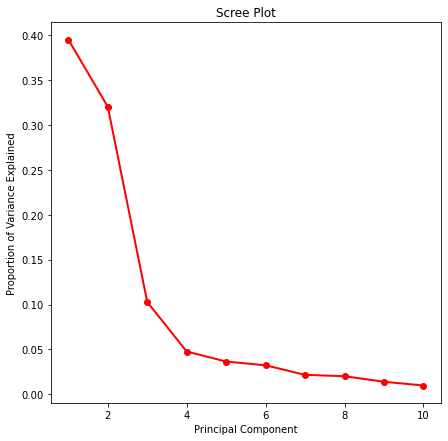

In [8]:
#Creating the Scree Plot
plt.figure(figsize=(7,7))

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [9]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.39471861 0.32002395 0.10276651 0.04771292 0.03652619 0.0323709
 0.02174367 0.02018602 0.0140641  0.00988714]
Cumulative Prop. Variance Explained:  [0.39471861 0.71474256 0.81750906 0.86522198 0.90174817 0.93411907
 0.95586274 0.97604875 0.99011286 1.        ]


### Scree Plot Analysis
From the above plot we can see that **71.4%** of the variance in our total dataset is explained by the first and second Principal Components. With this evidence, we can conclude that the first and second Principal Components will suffice for representing the majority (over 70%) of the variance in our data.